In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import climvae.utils.preproc as utpp

plt.style.use("./../paper.mplstyle")

In [2]:
ds = xr.open_dataset("/home/jakob/Code/climate_vae/data/sst/monthly/sea_surface_temperature_monthly_coarse_1950_2021.nc")
ds = utpp.check_dimensions(ds)

In [3]:
da = ds['sst']

# change coordinates to dateline == 0
da = utpp.set_antimeridian2zero(da)

# Cut area of interest
lon_range=[120, -66]
lat_range=[-30, 32]
lon_range = utpp.get_antimeridian_coord(lon_range)
print(f'Get selected area: lon={lon_range}, lat={lat_range}!')
da = utpp.cut_map(
    da, lon_range=lon_range, lat_range=lat_range
)
da

Set the dateline to the new longitude zero.
Get selected area: lon=[-60 114], lat=[-30, 32]!


<xarray.DataArray 'sst' (time: 864, lat: 63, lon: 175)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ..., 294.97836, 294.95874,
         295.04788],
        [      nan,       nan, 281.64987, ..., 294.9118 , 295.05917,
         295.00153],
        [      nan,       nan, 280.99683, ..., 294.46378, 294.57965,
         294.42575]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ..., 299.15854, 299.2244 ,
         298.5998 ],
        [      nan,       nan, 290.179  , ..., 298.29257, 298.08615,
         298.18698],
        [      nan,       nan, 289.62735, ..., 297.8637 , 297.77948,
         297.75516]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ..., 297.44794, 297.23975,
         296.7937 ],
        [      nan,       nan, 285.56967, ..., 296.47516, 296.38443,
         296.55228],
        [      nan,       nan, 284.35907, ..., 295.99472, 295.88916,
         295.84644]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-12-01
  * lat      (lat) float64 -30.0 -29.0 -28.0 -27.0 -26.0 ... 29.0 30.0 31.0 32.0
  * lon      (lon) float64 -60.0 -59.0 -58.0 -57.0 ... 111.0 112.0 113.0 114.0
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [4]:
# coarse grid if needed
grid_step = 5
print(f'Interpolate grid on res {grid_step}')
da, grid = utpp.set_grid(da, step_lat=grid_step, step_lon=grid_step)
da

Interpolate grid on res 5


<xarray.DataArray 'sst' (time: 864, lat: 13, lon: 35)>
array([[[      nan,       nan,       nan, ..., 292.2058 , 290.8974 ,
               nan],
        [      nan,       nan,       nan, ..., 292.71387, 292.48212,
               nan],
        [      nan,       nan,       nan, ..., 293.37283, 294.50775,
               nan],
        ...,
        [298.13354, 299.1033 , 298.84064, ..., 298.8472 ,       nan,
         298.47345],
        [288.7939 , 296.53812, 295.93738, ..., 297.9012 , 296.9107 ,
         297.3932 ],
        [      nan, 288.81293, 294.44415, ..., 297.37656, 296.2517 ,
         294.7478 ]],

       [[      nan,       nan,       nan, ..., 292.50113, 291.32166,
               nan],
        [      nan,       nan,       nan, ..., 293.37936, 293.60397,
               nan],
        [      nan,       nan,       nan, ..., 294.2873 , 296.37354,
               nan],
...
        [300.98364, 301.17166, 301.44214, ..., 301.98605,       nan,
         301.93207],
        [295.9348 , 299.6206 , 299.07965, ..., 300.53168, 300.46228,
         300.5963 ],
        [      nan, 294.71234, 298.02267, ..., 300.20663, 297.99066,
         298.73386]],

       [[      nan,       nan,       nan, ..., 291.00165, 289.81775,
               nan],
        [      nan,       nan,       nan, ..., 291.7692 , 291.08234,
               nan],
        [      nan,       nan,       nan, ..., 291.80002, 293.14526,
               nan],
        ...,
        [299.42545, 299.2837 , 299.15854, ..., 300.92432,       nan,
         301.01154],
        [292.63696, 297.97287, 298.04642, ..., 300.04944, 299.76236,
         299.0933 ],
        [      nan, 291.48685, 296.75217, ..., 299.49188, 297.18042,
         296.67624]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-12-01
  * lat      (lat) float64 -30.0 -25.0 -20.0 -15.0 -10.0 ... 15.0 20.0 25.0 30.0
  * lon      (lon) float64 -60.0 -55.0 -50.0 -45.0 ... 95.0 100.0 105.0 110.0
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [5]:
print("Detrend and compute anomalies:")
# detrend data
da = utpp.detrend_dim(da, dim='time')
# compute anomalies
da = utpp.compute_anomalies(da, group='month')

Detrend and compute anomalies:


In [6]:
# Normalize data
da_norm = utpp.normalize(da, method='zscore')

Normalize data by zscore!


In [7]:
# Split into training and test
splity = 2010
start_time = ds.time.min().data
end_time = ds.time.max().data
split_time = np.datetime64(f"{splity}-01-01", 'D')
da_train = da.sel(time=slice(start_time, split_time))    
da_test = da.sel(time=slice(split_time, end_time))

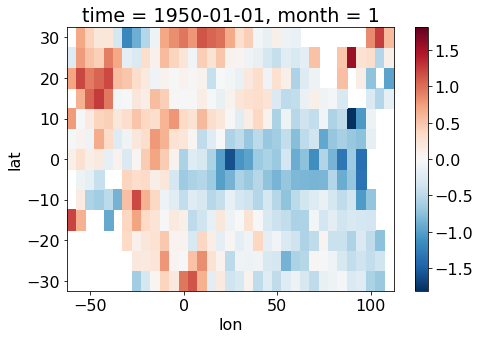

In [8]:
da_train[0].plot()

In [9]:
utpp.save_to_file(da_train, filepath=f'ssta_1950_{splity-1}.nc', var_name='ssta')
utpp.save_to_file(da_test, filepath=f'ssta_{splity}_2021.nc', var_name='ssta')
utpp.save_to_file(da, filepath='ssta_1950_2021.nc', var_name='ssta')